## Logistic Regression - Lesson 4

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pumpkins = pd.read_csv('../../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [153]:
from sklearn.preprocessing import LabelEncoder
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

corr = new_pumpkins.corr()
corr.style.background_gradient(cmap='coolwarm')

,City Name,Package,Variety,Origin,Item Size,Color
City Name,1.000000,0.145078,-0.009344,0.200548,-0.189651,-0.028224
Package,0.145078,1.000000,-0.330067,0.048547,-0.301333,-0.270385
Variety,-0.009344,-0.330067,1.000000,0.294407,0.105008,0.051986
Origin,0.200548,0.048547,0.294407,1.000000,-0.061450,0.073486
Item Size,-0.189651,-0.301333,0.105008,-0.061450,1.000000,0.224603
Color,-0.028224,-0.270385,0.051986,0.073486,0.224603,1.000000


In [154]:
new_pumpkins.info()
new_pumpkins.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 23 to 1693
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   City Name  586 non-null    int64
 1   Package    586 non-null    int64
 2   Variety    586 non-null    int64
 3   Origin     586 non-null    int64
 4   Item Size  586 non-null    int64
 5   Color      586 non-null    int64
dtypes: int64(6)
memory usage: 32.0 KB


City Name    586
Package      586
Variety      586
Origin       586
Item Size    586
Color        586
dtype: int64

<BarContainer object of 586 artists>

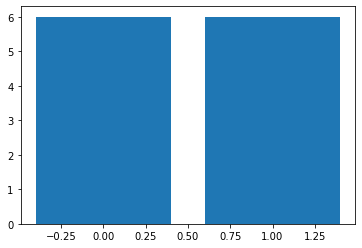

In [155]:
import matplotlib.pyplot as plt
plt.bar('Color','Item Size',data=new_pumpkins)